In [0]:
import numpy as np 
import pandas as pd
import os

from scipy.io import wavfile
import matplotlib.pyplot as plt

In [106]:
from google.colab import drive
drive.mount("/content/contentdrive")

Mounted at /content/contentdrive


In [0]:
!pip install librosa soundfile sklearn pyaudio


import librosa
import librosa.display
import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

  Using cached https://files.pythonhosted.org/packages/ab/42/b4f04721c5c5bfc196ce156b3c768998ef8c0ae3654ed29ea5020c749a6b/PyAudio-0.2.11.tar.gz
  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Failed to build pyaudio
    Running setup.py install for pyaudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6rf4c9av/pyaudio/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6rf4c9av/pyaudio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-iotstewd/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


## In order to become familiar with data, let's visualize some of it's audio files: Data Visualisation ##

In [0]:
directory = '/content/contentdrive/My Drive/emotion/meld/'

### One random audioset from Disguist folder ###

In [0]:
#To play a sound excerpt in the Jupyter Notebook

import IPython.display as ipd
ipd.Audio(directory + '/train/disgust/MEL_dia1000_utt0_negative_DIS.wav')

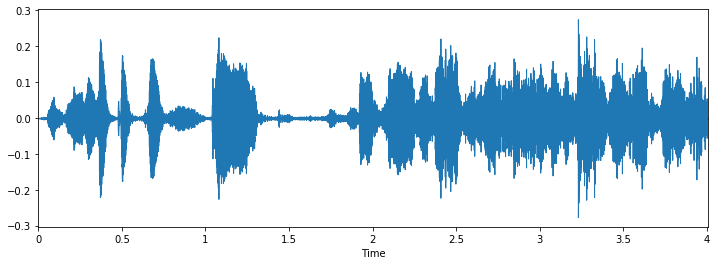

In [0]:
fn = '/train/disgust/MEL_dia1000_utt0_negative_DIS.wav'

data, sampling_rate = librosa.load( directory + fn)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

### One random audioset from Fear folder ###

In [0]:
ipd.Audio(directory + '/train/fear/MEL_dia1016_utt11_negative_FEA.wav')

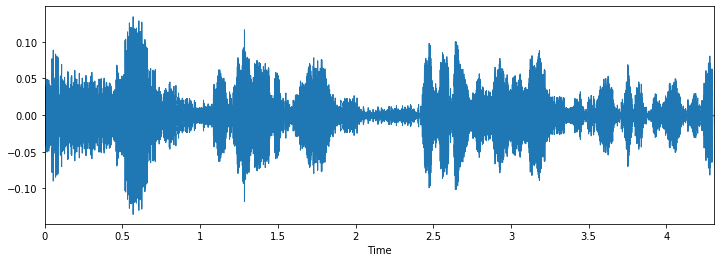

In [0]:
fn = '/train/fear/MEL_dia1016_utt11_negative_FEA.wav'

data, sampling_rate = librosa.load( directory + fn)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)  

### One random audioset from Sad folder ###

In [0]:
ipd.Audio(directory + '/train/sad/MEL_dia1001_utt4_negative_SAD.wav')

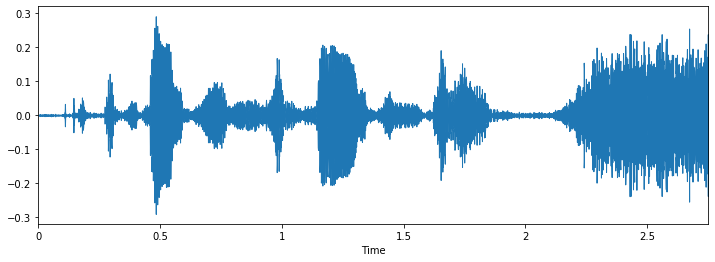

In [0]:
fn = '/train/sad/MEL_dia1001_utt4_negative_SAD.wav'

data, sampling_rate = librosa.load( directory + fn)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)  
  

### A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals. ###

Let's see the spectogram of an audio file

In [0]:
audio_path = '/content/contentdrive/My Drive/emotion/meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav'
x , sr = librosa.load(audio_path)
x

array([ 2.5342699e-04,  1.1929779e-04, -6.8567540e-05, ...,
       -2.6109876e-04, -2.1419297e-04,  0.0000000e+00], dtype=float32)

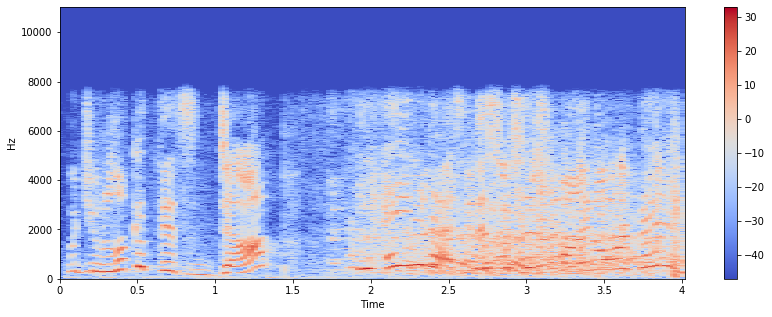

In [0]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

.stft converts data into short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display spectogram

## Feature Extraction ## 

We can use MFCC to be our input feature. Loading audio data and converting it to MFCCs format can be easily done by the Python package librosa

In [0]:
def extract_feature2(file_name, mfcc, chroma, mel):
  x , sr = librosa.load(audio_path)
  if chroma:
    X = librosa.stft(x)
    result=np.array([])
  if mfcc:
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr))
    result=np.hstack((result, mfccs))
  if chroma:
    chroma=np.mean(librosa.feature.chroma_stft(S=X, sr=sr).T,axis=0)
    result=np.hstack((result, chroma))
  if mel:
    mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
    result=np.hstack((result, mel))
  return result

In [0]:
#DataFlair - Emotions in the dataset
emotions={
  '01':'disguist',
  '02':'fear',
  '03':'happy',
  '04':'neutral',
  '05':'sad'
}

#DataFlair - Emotions to observe
observed_emotions=['disguist', 'fear', 'happy', 'neutral', 'sad']

In [0]:
x=[]
y=[]

In [0]:
for file in os.listdir(directory + "train/disgust/"):
    file_name=os.path.basename(file)
    emotion = 'disgust'
    feature = extract_feature2(directory + "train/disgust/" + file_name, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)


In [120]:
print(len(y))
print(x[151].shape)

2057
(141,)


In [0]:
for file in os.listdir(directory + "train/fear/"):
    file_name=os.path.basename(file)
    emotion = 'fear'
    feature = extract_feature2(directory + "train/fear/" + file_name, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

In [0]:
for file in os.listdir(directory + "train/happy/"):
    file_name=os.path.basename(file)
    emotion = 'happy'
    feature = extract_feature2(directory + "train/happy/" + file_name, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

In [0]:
for file in os.listdir(directory + "train/neutral/"):
    file_name=os.path.basename(file)
    emotion = 'neutral'
    feature = extract_feature2(directory + "train/neutral/" + file_name, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

In [0]:
for file in os.listdir(directory + "train/sad/"):
    file_name=os.path.basename(file)
    emotion = 'sad'
    feature = extract_feature2(directory + "train/sad/" + file_name, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

In [126]:
x[0].shape

(141,)

In [73]:
## Residual Code

x=[]
y=[]

for file in os.listdir(directory + "train/disgust/"):
    file_name=os.path.basename(file)
    emotion = 'disgust'
    audio_path = directory + "train/disgust/" + file_name
    x , sr = librosa.load(audio_path)
    X = librosa.stft(x)
    #mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sr))
    chroma = np.mean(librosa.feature.chroma_stft(S=X, sr=sr).T,axis=0)
    #print(chroma)
    #x.append(feature)
    #y.append(emotion)


[ 0.00087185+0.00181365j -0.00099082+0.00025027j  0.00577776-0.0100231j
 -0.00041284+0.00413204j -0.00440038+0.00295993j -0.00124   -0.00337964j
  0.00307435-0.0020131j   0.00060537-0.00411629j  0.00104317+0.00310266j
  0.00073199-0.00321186j  0.00399795+0.00017616j -0.0055343 +0.00153817j]
[-0.00396601+0.01333382j  0.00132359-0.00883499j  0.00385618+0.00915055j
  0.00861523+0.00359449j -0.00146171-0.01111999j -0.02195941-0.00718875j
  0.01189819+0.0050988j  -0.01072408-0.00951936j  0.02235515+0.00855001j
  0.01193414-0.00245981j -0.00776443-0.00461287j -0.00234735+0.00783737j]
[ 0.0066727 +0.05961028j -0.00037735-0.02151747j  0.03304118-0.01265694j
  0.03151126-0.0150418j  -0.03579042+0.03939419j  0.00394972-0.02493469j
  0.01135284-0.01000091j  0.00649687+0.01934695j  0.00936321-0.01653258j
 -0.06598014+0.00047245j -0.02544672+0.03476973j  0.02060029-0.03692583j]
[-0.01276625+0.09329345j -0.03419749-0.0456867j   0.02521787-0.00857952j
 -0.01173156-0.00662758j  0.04348622+0.00342796j 

### For test dataset ### 

In [0]:
x_val=[]
y_val=[]

In [0]:
for file in os.listdir(directory + "val/disgust/"):
    file_name=os.path.basename(file)
    emotion = 'disgust'
    feature = extract_feature2(directory + "val/disgust/" + file_name, mfcc=True, chroma=True, mel=True)
    x_val.append(feature)
    y_val.append(emotion)


In [138]:
print(len(x_val))
print(x_val[15].shape)

28
(141,)


In [0]:
for file in os.listdir(directory + "val/fear/"):
    file_name=os.path.basename(file)
    emotion = 'fear'
    feature = extract_feature2(directory + "val/fear/" + file_name, mfcc=True, chroma=True, mel=True)
    x_val.append(feature)
    y_val.append(emotion)

In [0]:
for file in os.listdir(directory + "val/happy/"):
    file_name=os.path.basename(file)
    emotion = 'happy'
    feature = extract_feature2(directory + "val/happy/" + file_name, mfcc=True, chroma=True, mel=True)
    x_val.append(feature)
    y_val.append(emotion)

In [0]:
for file in os.listdir(directory + "val/neutral/"):
    file_name=os.path.basename(file)
    emotion = 'neutral'
    feature = extract_feature2(directory + "val/neutral/" + file_name, mfcc=True, chroma=True, mel=True)
    x_val.append(feature)
    y_val.append(emotion)

In [0]:
for file in os.listdir(directory + "val/sad/"):
    file_name=os.path.basename(file)
    emotion = 'sad'
    feature = extract_feature2(directory + "val/sad/" + file_name, mfcc=True, chroma=True, mel=True)
    x_val.append(feature)
    y_val.append(emotion)

## Let's build the classifier ##

In [0]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [0]:
x = np.abs(x)

In [148]:
model.fit(x, y)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
x_val = np.abs(x_val)

In [0]:
y_pred = model.predict(x_val)

In [159]:
y_val = np.array(y_val)
y_val.shape

(838,)

In [160]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true = y_val, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 62.65%


#### Refrences ####


*   https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d 
*   https://data-flair.training/blogs/python-mini-project-speech-emotion-recognition/ 

